# Homework 1 (due March 6)

Finish this homework in the appropriate cells, and copy this file to your home directory on ursa, so I can grab them and inspect them. Please keep the original filename.

## Q1. 
Create a new file called "hello.py" with just one python statement that prints "hello" to the screen. Test that it works with the command
```
    python hello.py
```
Now we want to promote this script to become a true unix command, so we
want to just type in a unix terminal
```
      hello.py
```
and get the same "hello" printed to the screen.   

Try this out, but what errors can you think of (and maybe you got) when you worked this out, and explain your results.

**Hint**:  I was able to get 4 types of errors at different stages of getting this to work.

## A1.

Starting with a one liner text file:
```
   echo "print('hello')" > hello.py
```

I was able to get the following types or errors, in the following order of events while trying to fix them:

1) "hello.py: Command not found."

   . (the current directory) is not in the path.  Fix this with "export PATH=.:$PATH" in bash, or "setenv PATH .:$PATH" in csh. After fixing this, I got:

2) "hello.py: Permission denied."

   forgot "chmod +x hello.py" to make the script executable. After this I got:

3) "Unescaped left brace in regex is deprecated,  ...."

   There is no proper #!, and it then assumes bash (or /bin/sh), so we need to teach it that this is a python script. After trying that, I got this:

4) "hello.py: Command not found."

   you might not get this, but this is not a repeat of 1), it's when you give the path
   of the #! wrong, e.g.  #!/bin/python, since it's #!/usr/bin/python. You can also make it #!/usr/bin/env python"



## Q2.

Assign an integer value to **n**. Write a snippet of code that computes the sum of all even numbers up to and including **n**. Test this for a few small values of **n**, even and odd. Print out the sum for n=999 and n=1000. What happened if you set **n** to be a negative number.

You can use any method you like: Functions, For loops., Numpy arrays, Python lists, just to name a few.

In [1]:
# A2.
import numpy as np

def sum1(n):
    """straight sum, for-loop with if"""
    sum = 0
    for i in range(n+1):
        if i%2 == 0:             # only add even numbers
            sum += i
    return sum

def sum2(n):
    """only half the array, more efficient"""
    sum = 0
    n2 = n//2                # the choice of n2
    for i in range(n2+1):    # and n2+1 requires thought
        sum += i
    sum *= 2
    return sum

def sum3(n):
    """full range, but stepping in two"""
    sum = 0
    for i in range(0,n+1,2):
        sum += i
    return sum

def sum4(n):
    """using sum2 method and numpy.sum is fast"""
    n2 = n//2
    a = np.arange(n2+1)
    return 2*a.sum()

def sum5(n):
    """looping in numpy is also slow"""
    sum = 0
    n2 = n//2
    for i in np.arange(n2+1):
        sum += i
    sum *= 2
    return sum

# for cases n=3 and n=4 we know the answer (2 and 6 resp.)
for s in [sum1,sum2,sum3,sum4,sum5]:
    print("test for 3,4: %d %d %s" % (s(2),s(4),s.__doc__))

# the required numbers for the homework
print("%d %d" % (999,sum1(999)))
print("%d %d" % (1000,sum1(1000)))

# and what the heck, give it a big number and see how they all perform
n = 1000000
%time s1=sum1(n)
%time s2=sum2(n)
%time s3=sum3(n)
%time s4=sum4(n)
%time s5=sum5(n)

# they better all be the same still
print(s1,s2,s3,s4,s5)
    

test for 3,4: 2 6 straight sum, for-loop with if
test for 3,4: 2 6 only half the array, more efficient
test for 3,4: 2 6 full range, but stepping in two
test for 3,4: 2 6 using sum2 method and numpy.sum is fast
test for 3,4: 2 6 looping in numpy is also slow
999 249500
1000 250500
CPU times: user 168 ms, sys: 0 ns, total: 168 ms
Wall time: 167 ms
CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 57 ms
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 41.9 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.15 ms
CPU times: user 76 ms, sys: 0 ns, total: 76 ms
Wall time: 79.1 ms
250000500000 250000500000 250000500000 250000500000 250000500000


# Discussion

For n=1000000 I obtained timings of around 160ms, 40ms, 40ms, 1ms and 80ms resp. (in CPU, not Wall clock time).  If you repeat these for smaller values of **n** you might see a 0 "CPU times" (too fast to measure), but because interfaces to ipython are slow, you will see varying degrees of time it takes to finish (Wall time)

Clearly shortening the loop and thus removing the if-statement in **sum1** helped a lot, but we are looping in python, which is slow.

Converting to numpy however means that memory has to be sacrificed in an array (**a**) over which then can be summed really fast.

# Q3.

Why does python not have the switch/case control flow statement like one has in C and Java?

If you use an online resource, give a reference. 


# A3.

First an example in python how it would look if it followed C:
```
   switch n:
      case 1:
         print("n=1")
         # break
      case 2:
         print("n=2")
         # break
      case 3:
         print("n=3")
         # break
      default:
         print("something else")       
```
however in C you would need an additional **break** before the next **case** if you did not want to follow through the next **case**. This gives for interesting flow patterns!


Apart from this odd ambiguity, if a **break** would be needed, you can also solve this with a series of **if/elif/elif/.../else**:
```
    if n==1:
        print("n=1")
    elif n==2:
        print("n=2")
    elif n==3:
        print("n=3")
    else:
        print("something else")
        
```


If you google, you will find some discussions and functional replacements using a python dictionary. But these are limited to the cases where multiple statements in each case can be replaced with a single function call.

The python language is evolved using PEP (Python Enhanced Proposal). Check out this one: 
https://www.python.org/dev/peps/pep-3103/ where it was rejected to be part of the language, way back in 2006! Guido van Rossum has a nickname of the Benevolent Dictator For Life (BDFL).



# Q4.

For the following experiment we want to plot the performance difference between adding up the elements in a list vs. numpy array, as function of the size of the list/array. Much like in the **03-arrays** time your list and numpy cell for a number of values of n (you may need to go up to n=1,000,000 or even higher).

Put your numbers in a hardcoded list in **A3c**. You will need to rerun the **A3a** and **A3b** cells a number of times.

Plot your results in a log-log plot. What is a nicer plot, N vs. CPU or N vs. CPU/N?

# A4.

Below we will first set up a cell with some definitions, and try out a few loops to get an idea how to accumulate the numbers for the graph most efficiently without bringing the machine to a grinding halt.


In [2]:
#  this cell sets up variables and functions, so we don't need to
#  time these. initializing arrays will take time too, but we're not 
#  interested in these either.
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

n = 5000000
mode = 1

if mode == 0:
    # simple sequence
    a1 = np.arange(n)
    a2 = np.arange(n * 1.0) 
    a3 = list(range(n))
    a4 = a2.tolist()
else:
    # random numbers between 0 and 100 (more expensive)
    np.random.seed(123)
    a2 = np.random.uniform(0.0,100.0,n)
    a1 = a2.astype(np.int64)
    a3 = a1.tolist()
    a4 = a2.tolist()
    
def geta(n, seed=None):
    """return random numpy array [0,100], optional seed"""
    if seed != None:
        np.random.seed(seed)
    a = np.random.uniform(0.0,100.0,n)
    return a

def sum0(a):
    """the native sum that python lists support"""
    return sum(a)

def sum1(a):
    """loop over array elements and sum them"""
    sum = 0
    for x in a:
        sum += x
    return sum

def sum2(a):
    """loop over array using indices"""
    sum = 0
    for i in range(len(a)):
        sum += a[i]
    return sum

def sum3(a):
    """native and fast numpy sum"""
    return a.sum()

if n == 10:
    # debugregression test
    print("n=%d mode=%d" % (n,mode))
    print(type(a1),type(a2),type(a3),type(a4))
    print(type(a1[0]),type(a2[0]),type(a3[0]),type(a4[0]))
    if mode==0: print("Should all print 45 or 45.0")
    for a in [a1,a2,a3,a4]:
        print(sum1(a))
        print(sum2(a))
    for a in [a1,a2]:
        print(sum3(a))
else:
    print("Done for n=",n)

Done for n= 5000000


In [3]:
# comparing various methods (in the end we'll just pick sum1 and sum3)
print(n)
print("  numpy int")
%time s01 = sum0(a1)
%time s11 = sum1(a1)
%time s21 = sum2(a1)
%time s31 = sum3(a1)
print("  numpy float")
%time s02 = sum0(a2)
%time s12 = sum1(a2)
%time s22 = sum2(a2)
%time s32 = sum3(a2)
print("  list int")
%time s03 = sum0(a3)
%time s13 = sum1(a3)
%time s23 = sum2(a3)
print("  list float")
%time s04 = sum0(a4)
%time s14 = sum1(a4)
%time s24 = sum2(a4)

5000000
  numpy int
CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 604 ms
CPU times: user 776 ms, sys: 0 ns, total: 776 ms
Wall time: 776 ms
CPU times: user 996 ms, sys: 0 ns, total: 996 ms
Wall time: 994 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.22 ms
  numpy float
CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 584 ms
CPU times: user 804 ms, sys: 0 ns, total: 804 ms
Wall time: 803 ms
CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 1.01 s
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.03 ms
  list int
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 51.8 ms
CPU times: user 256 ms, sys: 0 ns, total: 256 ms
Wall time: 258 ms
CPU times: user 568 ms, sys: 0 ns, total: 568 ms
Wall time: 567 ms
  list float
CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 29.8 ms
CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 226 ms
CPU times: user 432 ms, sys: 0 ns, total: 432 ms
Wall time: 432 ms


This first analysis shows us that for numpy arrays there isn't much difference between sum0 and sum1 (~20-30%), but the native sum3 is much much faster. But for python lists sum0 is a lot faster than sum1 (factor 5-6). Since most numerical work is numpy floating point, we will do the comparison below between sum1 and sum3 for the **a2** array.

In [4]:
# A3a.  time the python list
n1 = [10000, 100000, 1000000, 10000000, 20000000, 40000000]
for n in n1:
    print(n)
    %time a = geta(n)      # ignore these timings 
    %time s = sum1(a)
    del(a)
c1  = [4e-3, 28e-3, 148e-3, 1.51,   2.86, 5.9]
c1i = [1e-3,  4e-3,  12e-3, 744e-3, 2.45, 1.12]

10000
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 289 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.72 ms
100000
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.25 ms
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.6 ms
1000000
CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 15.2 ms
CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 149 ms
10000000
CPU times: user 148 ms, sys: 8 ms, total: 156 ms
Wall time: 153 ms
CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.49 s
20000000
CPU times: user 308 ms, sys: 8 ms, total: 316 ms
Wall time: 313 ms
CPU times: user 2.88 s, sys: 0 ns, total: 2.88 s
Wall time: 2.88 s
40000000
CPU times: user 548 ms, sys: 16 ms, total: 564 ms
Wall time: 563 ms
CPU times: user 5.82 s, sys: 0 ns, total: 5.82 s
Wall time: 5.82 s


In [5]:
# A3b.  time the numpy array
n2 = [  10000000, 40000000, 100000000, 200000000, 300000000, 500000000]
for n in n2:
    print(n)
    %time a = geta(n)     # ignore these timings
    %time s=sum3(a)
    del(a)
c2  = [4e-3, 20e-3, 52e-3, 116e-3, 172e-3, 268e-3]
c2i = [0.2,    0.9,   3.0,   4.46,   7.11,  14.5]
print(len(n2),len(c2))

10000000
CPU times: user 140 ms, sys: 4 ms, total: 144 ms
Wall time: 143 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.06 ms
40000000
CPU times: user 520 ms, sys: 64 ms, total: 584 ms
Wall time: 580 ms
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 22.1 ms
100000000
CPU times: user 1.45 s, sys: 1.73 s, total: 3.18 s
Wall time: 3.18 s
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 65.1 ms
200000000
CPU times: user 2.82 s, sys: 4.03 s, total: 6.85 s
Wall time: 6.85 s
CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 115 ms
300000000
CPU times: user 4.49 s, sys: 6.4 s, total: 10.9 s
Wall time: 10.9 s
CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 183 ms
500000000
CPU times: user 7.88 s, sys: 6.28 s, total: 14.2 s
Wall time: 14.8 s
CPU times: user 296 ms, sys: 48 ms, total: 344 ms
Wall time: 348 ms
6 6


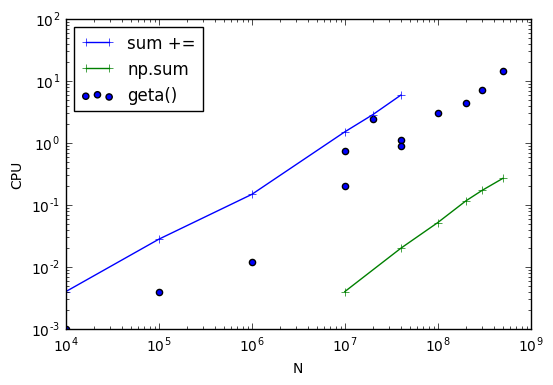

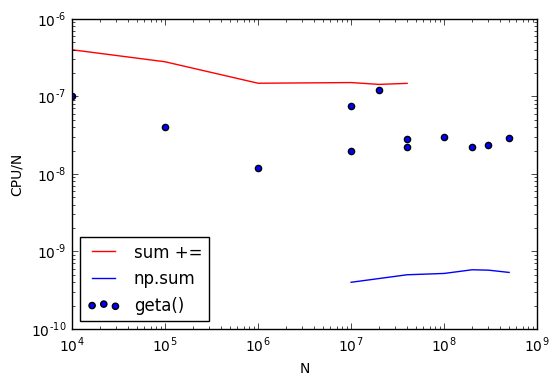

In [6]:
# A3c.  plot the results]

# repeating the arrays we obtained in A3a and A3b:

n1 = [10000, 100000, 1000000, 10000000, 20000000, 40000000]
c1 = [4e-3, 28e-3, 148e-3, 1.51, 2.86, 5.9]
c1i = [1e-3, 4e-3, 12e-3, 744e-3, 2.45, 1.12]

n2 = [  10000000, 40000000, 100000000, 200000000, 300000000, 500000000]
c2 = [4e-3, 20e-3, 52e-3, 116e-3, 172e-3, 268e-3]
c2i = [0.2, 0.9,    3.0,   4.46,   7.11,  14.5]

x1=np.array(n1)
y1=np.array(c1)
y1i=np.array(c1i)
z1=y1/x1
z1i=y1i/x1
x2=np.array(n2)
y2=np.array(c2)
y2i=np.array(c2i)
z2=y2/x2
z2i=y2i/x2

plt.figure()
plt.plot(x1,y1,'+-',label='sum +=')
plt.plot(x2,y2,'+-',label='np.sum')
plt.scatter([x1,x2],[y1i,y2i],label='geta()')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('CPU')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(x1,z1,'r-',label='sum +=')
plt.plot(x2,z2,'b-',label='np.sum')
plt.scatter([x1,x2],[z1i,z2i],label='geta()')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('CPU/N')
plt.legend(loc='best')
plt.show()